# **NFL: Rushing**
<img src="images/leveon_bell.jpeg" width='300px'>

In [45]:
import pandas as pd 
import numpy as np 
import boto3 
import json 
import time 
import os 

import seaborn as sns 
import matplotlib.pyplot as plt 

from typing import List, Dict 

plt.style.use('ggplot')

## **AWS Helpers** 

In [34]:
years: range = range(1973,2024)
secrets: 'SecretsManager' = boto3.client('secretsmanager')
rushing_stats: str = json.loads(secrets.get_secret_value(SecretId='nfl_stats') .get('SecretString') ).get('rushing_stats')
dst_path: str = json.loads(secrets.get_secret_value(SecretId='nfl_stats') .get('SecretString') ).get('dataset_path')
dbg_msg: str = "[ \033[92m+\033[0m ]"

## **Rushing Stats Leaders**

In [30]:
search_results: List = []
for year in years: 
    curr_df: 'DataFrame' = pd.io.html.read_html(rushing_stats % (year))[0] 
    curr_df['Year'] = [year] * curr_df.shape[0] 
    search_results.extend(curr_df.to_dict(orient='records'))
    print("%s Collecting Rushing Stats for %s" % (dbg_msg, year) )
    time.sleep(np.random.choice(range(1,3)) )

[ + ] Collecting Rushing Stats for 1973
[ + ] Collecting Rushing Stats for 1974
[ + ] Collecting Rushing Stats for 1975
[ + ] Collecting Rushing Stats for 1976
[ + ] Collecting Rushing Stats for 1977
[ + ] Collecting Rushing Stats for 1978
[ + ] Collecting Rushing Stats for 1979
[ + ] Collecting Rushing Stats for 1980
[ + ] Collecting Rushing Stats for 1981
[ + ] Collecting Rushing Stats for 1982
[ + ] Collecting Rushing Stats for 1983
[ + ] Collecting Rushing Stats for 1984
[ + ] Collecting Rushing Stats for 1985
[ + ] Collecting Rushing Stats for 1986
[ + ] Collecting Rushing Stats for 1987
[ + ] Collecting Rushing Stats for 1988
[ + ] Collecting Rushing Stats for 1989
[ + ] Collecting Rushing Stats for 1990
[ + ] Collecting Rushing Stats for 1991
[ + ] Collecting Rushing Stats for 1992
[ + ] Collecting Rushing Stats for 1993
[ + ] Collecting Rushing Stats for 1994
[ + ] Collecting Rushing Stats for 1995
[ + ] Collecting Rushing Stats for 1996
[ + ] Collecting Rushing Stats for 1997


In [37]:
rushing_stats_df: 'DataFrame' = pd.DataFrame( search_results ) # player_team @year, against @opp
rushing_stats_df.to_csv(os.path.join(dst_path, 'rushing_stats_leaders.csv' ) )
years, yds = zip(*rushing_stats_df.groupby(['Year'])['Rush Yds'].max().to_dict().items())

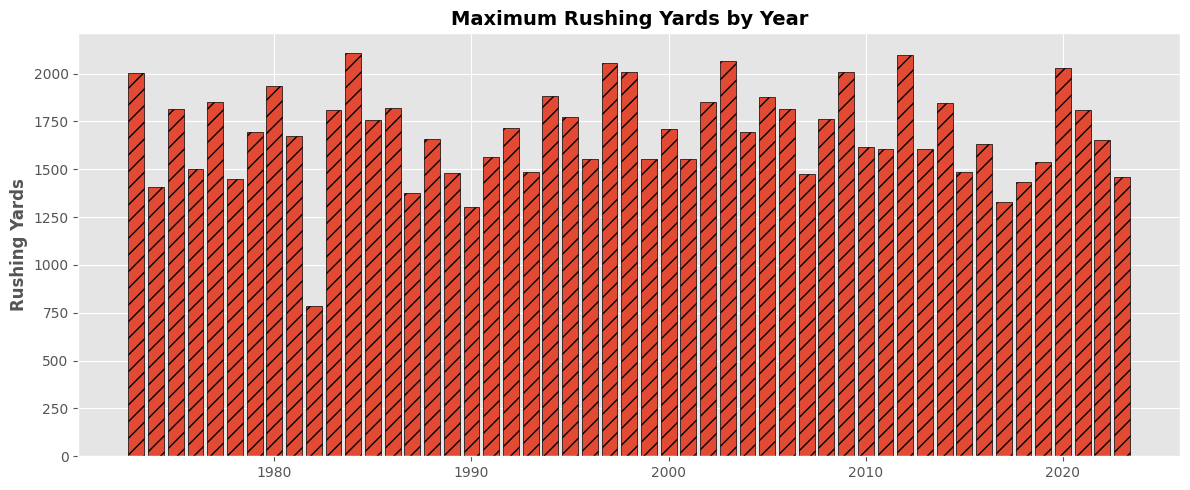

In [51]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot() 

ax.bar(x=list(years), height=list(yds), hatch='//', ec='k')
ax.set_title("Maximum Rushing Yards by Year", fontweight='bold', fontsize=14)
ax.set_ylabel("Rushing Yards", fontweight='bold')
plt.tight_layout() 

## **Players Maximum Rushing Stats**

In [122]:
stats: List = []
for year in rushing_stats_df['Year'].unique().tolist(): 
    stats.extend(rushing_stats_df.query(f"Year == {year}").sort_values(by='Rush Yds', ascending=False)[['Player', 'Rush Yds', 'Att', 'Year', 'Rush FUM']].head(1).to_dict(orient='records'))
stats_df: 'DataFrame' = pd.DataFrame(stats) 
stats_df.iloc[-15:]

,Player,Rush Yds,Att,Year,Rush FUM
36,Chris Johnson,2006,358,2009,3
37,Arian Foster,1616,327,2010,3
38,Maurice Jones-Drew,1606,343,2011,3
39,Adrian Peterson,2097,348,2012,3
40,LeSean McCoy,1607,314,2013,1
41,DeMarco Murray,1845,392,2014,3
42,Adrian Peterson,1485,327,2015,6
43,Ezekiel Elliott,1631,322,2016,5
44,Kareem Hunt,1327,272,2017,1
45,Ezekiel Elliott,1434,304,2018,6


/tmp/ipykernel_1833/3351790064.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


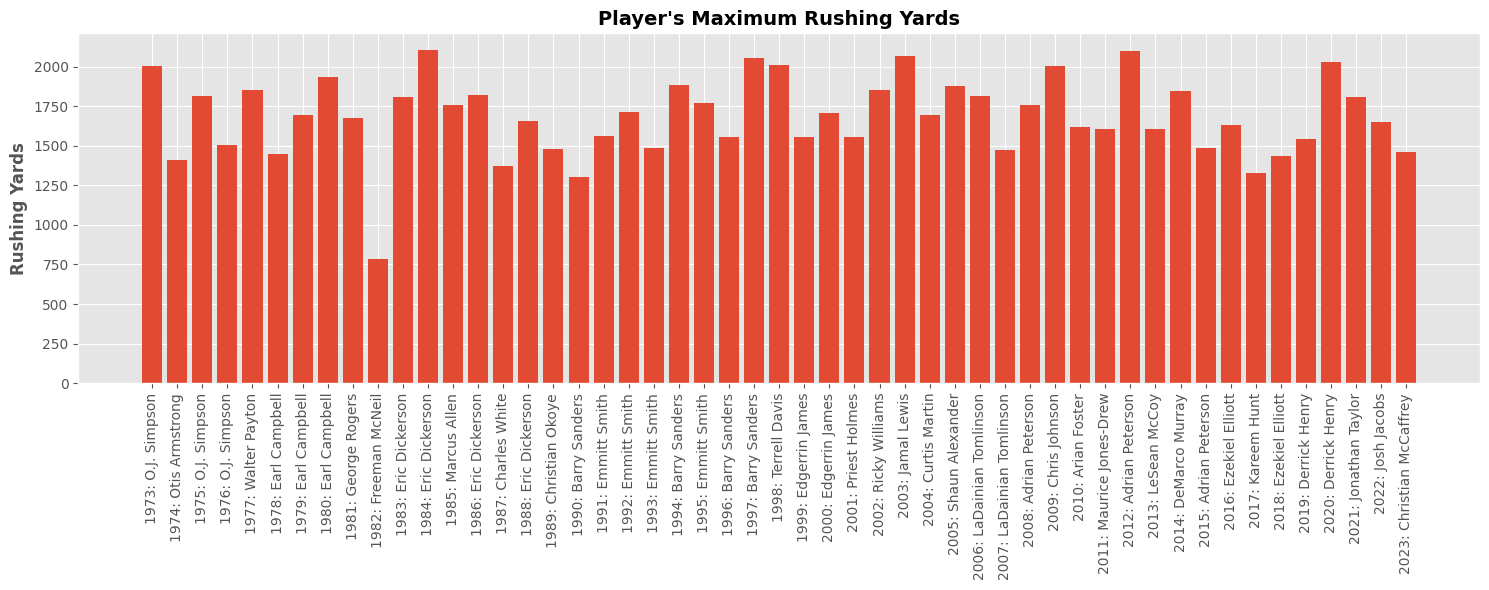

In [116]:
fig = plt.figure(figsize=(15,6)) 
ax = fig.add_subplot() 

ax.bar(x=stats_df.apply(lambda row: "%s: %s" % ( row['Year'], row['Player'] ) , axis=1).tolist(), height=stats_df['Rush Yds'].tolist() )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Player's Maximum Rushing Yards", fontweight='bold', fontsize=14)
ax.set_ylabel("Rushing Yards", fontweight='bold')
plt.tight_layout() 